In [1]:
import re
import ast
import numpy as np
import math
from functools import cache, cmp_to_key
from itertools import product
from typing import Tuple

import networkx as nx

def read_file_to_string(file_path):
    with open(file_path,'r') as f:
        return f.read()
    
day_25_string = read_file_to_string('day_25_input.txt')
day_25_test = read_file_to_string('day_25_test.txt')
#day_20_test_2 = read_file_to_string('day_20_test_2.txt')
# day_20_test_3 = read_file_to_string('day_20_test_3.txt')
# day_20_test_4 = read_file_to_string('day_20_test_4.txt')
# day_20_test_5 = read_file_to_string('day_20_test_5.txt')

In [6]:
def parse_string(string):

    node_map = {}

    for line in string.split('\n'):

        node_map[line[:line.index(':')]] = [node.strip() for node in line[line.index(':')+1:].split(' ')][1:]

    return node_map

In [15]:
test_node_map = parse_string(day_25_test)
input_node_map = parse_string(day_25_string)

In [12]:
def create_graph(node_map):

    G = nx.Graph()

    for k,v in node_map.items():

        if not G.has_node(k):
            G.add_node(k, label=k)

        for node in v:
            
            if not G.has_node(node):
                G.add_node(node, label=node)
            
            G.add_edge(k, node)

    return G

In [13]:
test_graph = create_graph(test_node_map)

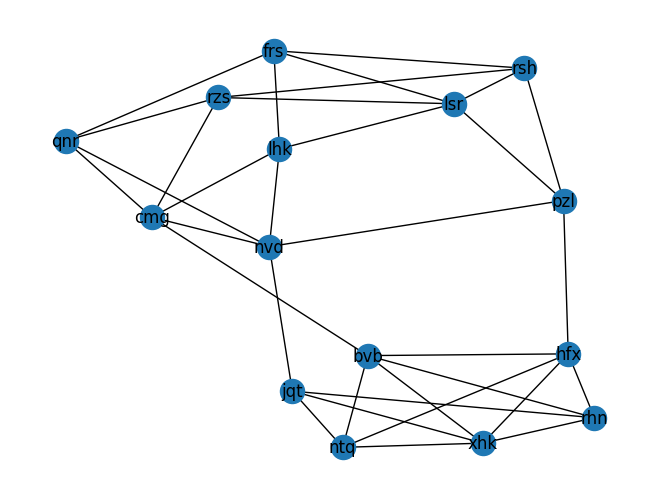

In [37]:
nx.draw(test_graph,with_labels=True)

In [38]:
test_graph.remove_edge('cmg','bvb')
test_graph.remove_edge('nvd','jqt')
test_graph.remove_edge('pzl','hfx')

In [39]:
test_subg_a, test_subg_b = nx.connected_components(test_graph)

print(len(test_subg_a)*len(test_subg_b))

54


In [16]:
input_graph = create_graph(input_node_map)

In [18]:
!pip install scipy

  Using cached scipy-1.11.4-cp39-cp39-win_amd64.whl (44.3 MB)


You should consider upgrading via the 'C:\Users\james\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


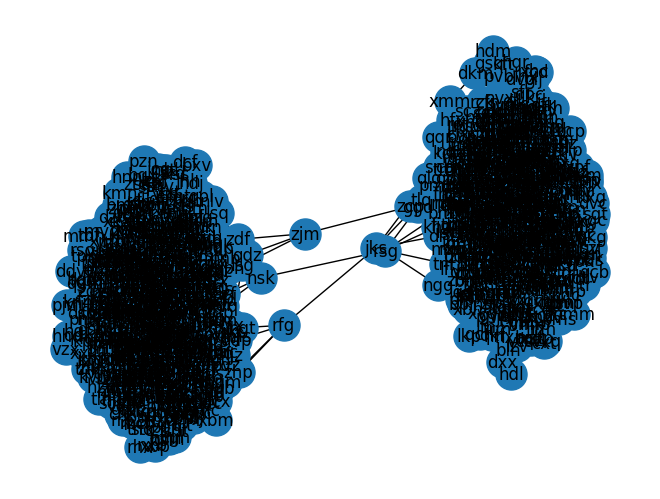

In [24]:
nx.draw(input_graph, with_labels=True, node_size = 500)

In [25]:
input_graph.remove_edge('nsk','rsg')

In [27]:
input_graph.remove_edge('rfg','jks')

In [29]:
input_graph.remove_edge('zjm','zcp')

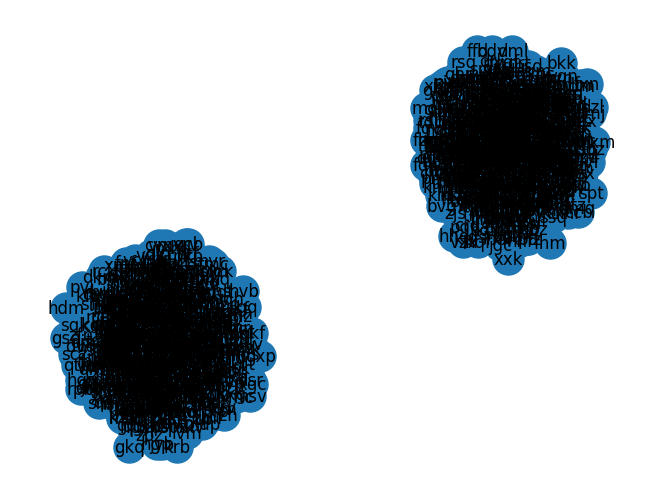

In [30]:
nx.draw(input_graph, with_labels=True, node_size = 500)

In [32]:
subg_a, subg_b = nx.connected_components(input_graph)

In [35]:
len(subg_a)

749

In [36]:
len(subg_b)

727

In [40]:
749*727

544523

In [ ]:
#by inspection, we have to cut nsk/rsg, rfg/jks, 